### Data Dictionary

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retaining those customers. Another group might include customers from non-profit organizations.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='darkgrid',font_scale=1.25)

from mpl_toolkits.mplot3d import Axes3D 

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

pd.set_option('display.max_columns', None) 

In [2]:
df = pd.read_csv("Cust_Segmentation.csv")

In [3]:
df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [5]:
df.isnull().sum()

Customer Id          0
Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
Address              0
DebtIncomeRatio      0
dtype: int64

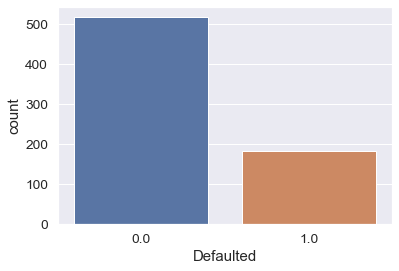

In [6]:
sns.countplot(df.Defaulted);

In [7]:
df.fillna(0, inplace=True)

In [8]:
df.isnull().sum()

Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64

In [9]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [10]:
df.drop(['Customer Id','Address'],axis=1,inplace=True)

In [11]:
df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [12]:
scaler = StandardScaler()

In [13]:
dfscaled = scaler.fit_transform(df)

In [14]:
dfscaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

### K-Means Clustering

In [15]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(dfscaled)
    wcss.append(kmeans.inertia_)

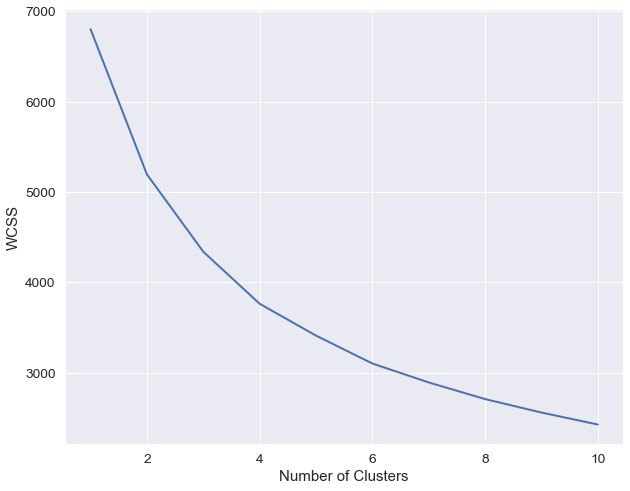

In [16]:
plt.figure(figsize=(10,8))
plt.plot(range(1,11),wcss,linewidth=2)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

### Execute K-Means after determining the suitable cluster

In [17]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

In [18]:
kmeans.fit(dfscaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

### Results

In [19]:
df_segm_kmeans = df.copy()

In [20]:
df_segm_kmeans

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8
846,28,2,7,34,0.359,2.021,0.0,7.0
847,25,4,0,18,2.802,3.210,1.0,33.4
848,32,1,12,28,0.116,0.696,0.0,2.9


In [21]:
df_segm_kmeans['Segment K-Means'] = kmeans.labels_

In [22]:
df_segm_kmeans

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Segment K-Means
0,41,2,6,19,0.124,1.073,0.0,6.3,2
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1
3,29,2,4,19,0.681,0.516,0.0,6.3,2
4,47,1,31,253,9.308,8.908,0.0,7.2,0
...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8,2
846,28,2,7,34,0.359,2.021,0.0,7.0,2
847,25,4,0,18,2.802,3.210,1.0,33.4,1
848,32,1,12,28,0.116,0.696,0.0,2.9,2


In [23]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-Means']).mean()

In [24]:
df_segm_analysis

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Segment K-Means,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991


In [25]:
df_segm_analysis['NoofObservations'] = df_segm_kmeans[['Segment K-Means','Age']].groupby(['Segment K-Means']).count()

In [26]:
df_segm_analysis['ProportionofObservations'] = df_segm_analysis['NoofObservations']/ df_segm_analysis['NoofObservations'].sum()

In [27]:
df_segm_analysis

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646,147,0.172941
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578,166,0.195294
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991,537,0.631765


In [28]:
df_segm_analysis.rename({0: '0',
                         1: '1',
                         2: '2'
                         },inplace=True)

In [29]:
df_segm_analysis

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,NoofObservations,ProportionofObservations
Segment K-Means,,,,,,,,,,
0,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.129252,13.915646,147,0.172941
1,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.987952,13.994578,166,0.195294
2,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991,537,0.631765


In [30]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-Means'].map({0: '0',
                                                                  1: '1',
                                                                  2: '2',
                                                                  })

In [31]:
df_segm_kmeans

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Segment K-Means,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,2,2
1,47,1,26,100,4.582,8.218,0.0,12.8,0,0
2,33,2,10,57,6.111,5.802,1.0,20.9,1,1
3,29,2,4,19,0.681,0.516,0.0,6.3,2,2
4,47,1,31,253,9.308,8.908,0.0,7.2,0,0
...,...,...,...,...,...,...,...,...,...,...
845,27,1,5,26,0.548,1.220,0.0,6.8,2,2
846,28,2,7,34,0.359,2.021,0.0,7.0,2,2
847,25,4,0,18,2.802,3.210,1.0,33.4,1,1
848,32,1,12,28,0.116,0.696,0.0,2.9,2,2


### Plot the clusters

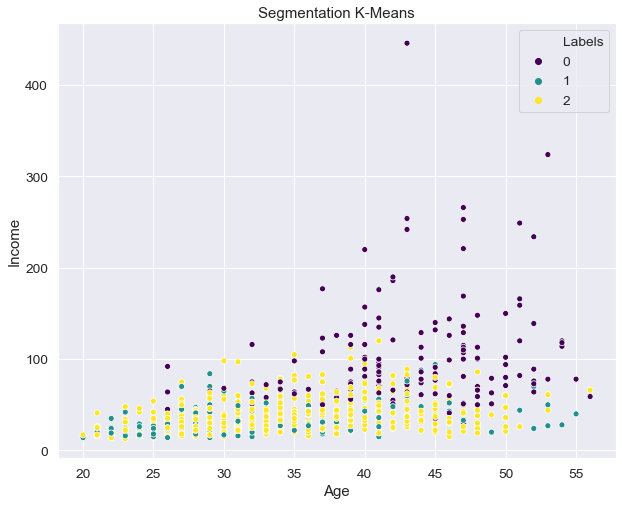

In [32]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette='viridis')
plt.title('Segmentation K-Means')
plt.show()

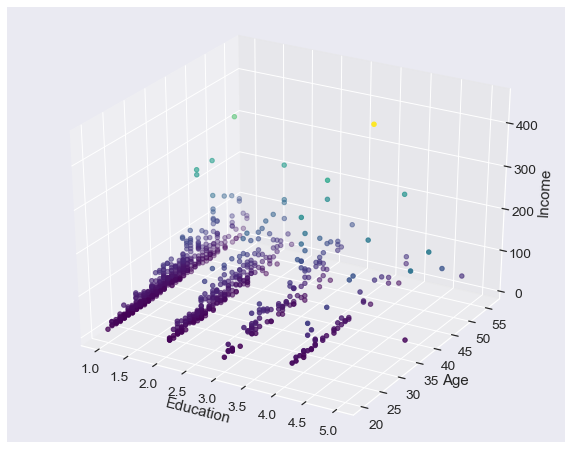

In [33]:
x_axis = df_segm_kmeans['Edu']
y_axis = df_segm_kmeans['Age']
z_axis = df_segm_kmeans['Income']

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(x_axis,y_axis,z_axis,c=z_axis, cmap='viridis')

ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

plt.show()